In [1]:
# Import
import pandas as pd
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Create a list for holding the cities.
cities = []

# Identify the nearrange(len(cities))range(len(cities))range(len(cities))est city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Create an endpoint URL for a city.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 75.33,
  'feels_like': 75.47,
  'temp_min': 71.02,
  'temp_max': 78.15,
  'pressure': 1021,
  'humidity': 62},
 'visibility': 10000,
 'wind': {'speed': 1.01, 'deg': 222, 'gust': 5.01},
 'clouds': {'all': 90},
 'dt': 1628090392,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1628070004,
  'sunset': 1628121630},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [6]:
# Get the JSON data.
boston_data = city_weather.json()

In [7]:
#boston_data['sys']

In [8]:
#boston_data['sys']['country']

In [9]:
#boston_data["dt"]

In [10]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)


42.3584 -71.0598 78.15 62 90 1.01


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2021, 8, 4, 15, 19, 52)

In [12]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-08-04 15:19:52'

In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
        
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
  
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1 
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
       
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saldanha
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | asyut
Processing Record 5 of Set 1 | ixtapa
Processing Record 6 of Set 1 | shingu
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | cherskiy
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | katsuura
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | mpika
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | ponta d

Processing Record 40 of Set 4 | tiksi
Processing Record 41 of Set 4 | nizhniy odes
Processing Record 42 of Set 4 | kaili
Processing Record 43 of Set 4 | lavrentiya
Processing Record 44 of Set 4 | vestmanna
Processing Record 45 of Set 4 | airai
Processing Record 46 of Set 4 | olgina
Processing Record 47 of Set 4 | tiruvottiyur
City not found. Skipping...
Processing Record 48 of Set 4 | mae hong son
Processing Record 49 of Set 4 | annaberg-buchholz
Processing Record 50 of Set 4 | eureka
Processing Record 1 of Set 5 | dzhusaly
City not found. Skipping...
Processing Record 2 of Set 5 | onguday
Processing Record 3 of Set 5 | san carlos
Processing Record 4 of Set 5 | anadyr
Processing Record 5 of Set 5 | hastings
Processing Record 6 of Set 5 | hofn
Processing Record 7 of Set 5 | bonfim
Processing Record 8 of Set 5 | dingle
Processing Record 9 of Set 5 | skeldon
Processing Record 10 of Set 5 | mpulungu
Processing Record 11 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 

Processing Record 26 of Set 8 | elizabeth city
Processing Record 27 of Set 8 | fort nelson
Processing Record 28 of Set 8 | khuzhir
Processing Record 29 of Set 8 | moerai
Processing Record 30 of Set 8 | adrar
Processing Record 31 of Set 8 | smithers
Processing Record 32 of Set 8 | dalianwan
Processing Record 33 of Set 8 | souillac
Processing Record 34 of Set 8 | namibe
Processing Record 35 of Set 8 | saint-augustin
Processing Record 36 of Set 8 | aswan
Processing Record 37 of Set 8 | ivybridge
Processing Record 38 of Set 8 | mahebourg
Processing Record 39 of Set 8 | lolua
City not found. Skipping...
Processing Record 40 of Set 8 | andenes
Processing Record 41 of Set 8 | lethem
Processing Record 42 of Set 8 | durres
Processing Record 43 of Set 8 | barra
Processing Record 44 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 45 of Set 8 | bridgewater
Processing Record 46 of Set 8 | toowoomba
Processing Record 47 of Set 8 | vao
Processing Record 48 of Set 8 | hobyo
Processin

Processing Record 19 of Set 12 | taseyevo
Processing Record 20 of Set 12 | niltepec
Processing Record 21 of Set 12 | pointe michel
Processing Record 22 of Set 12 | ereymentau
Processing Record 23 of Set 12 | maniitsoq
Processing Record 24 of Set 12 | santa rosa
Processing Record 25 of Set 12 | geraldton
Processing Record 26 of Set 12 | san juan
Processing Record 27 of Set 12 | luba
Processing Record 28 of Set 12 | san policarpo
Processing Record 29 of Set 12 | sayyan
Processing Record 30 of Set 12 | ijaki
City not found. Skipping...
Processing Record 31 of Set 12 | kattivakkam
Processing Record 32 of Set 12 | ponta delgada
Processing Record 33 of Set 12 | nizip
Processing Record 34 of Set 12 | samusu
City not found. Skipping...
Processing Record 35 of Set 12 | carmona
Processing Record 36 of Set 12 | antofagasta
Processing Record 37 of Set 12 | clarence town
-----------------------------
Data Retrieval Complete      
-----------------------------


In [27]:
#reorder the columns 
new_city_data_df=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_city_data_df]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saldanha,ZA,2021-08-04 15:19:53,-33.0117,17.9442,59.38,87,4,13.80
1,Busselton,AU,2021-08-04 15:19:30,-33.6500,115.3333,47.05,89,1,6.85
2,Asyut,EG,2021-08-04 15:19:54,27.1810,31.1837,111.38,8,3,10.25
3,Ixtapa,MX,2021-08-04 15:19:54,20.7000,-105.2000,83.23,78,75,0.00
4,Shingu,JP,2021-08-04 15:19:54,33.7333,135.9833,80.91,90,1,3.47


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

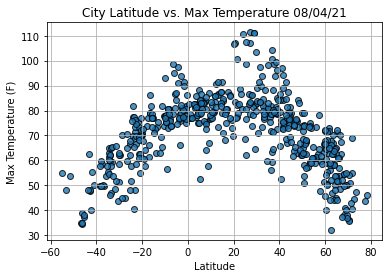

In [35]:
# Import time module
import time
import matplotlib.pyplot as plt
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

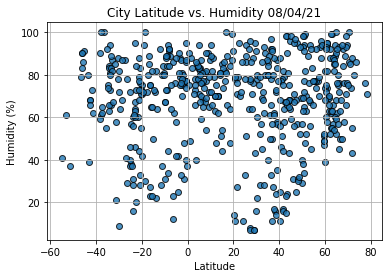

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

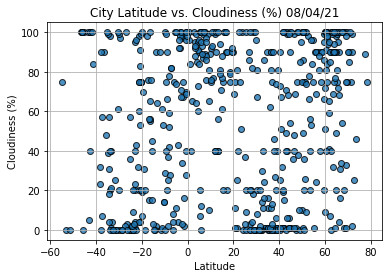

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

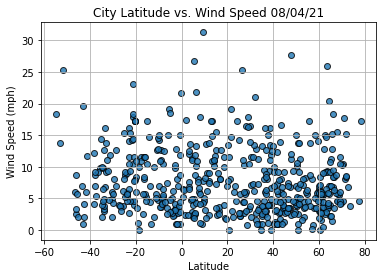

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [65]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    

In [41]:
index13 = city_data_df.loc[13]
index13

City                        Mpika
Country                        ZM
Date          2021-08-04 15:19:57
Lat                      -11.8343
Lng                       31.4529
Max Temp                    69.49
Humidity                       28
Cloudiness                      0
Wind Speed                   9.89
Name: 13, dtype: object

In [42]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
537     True
538     True
539     True
540    False
541    False
Name: Lat, Length: 542, dtype: bool

In [44]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Asyut,EG,2021-08-04 15:19:54,27.1810,31.1837,111.38,8,3,10.25
3,Ixtapa,MX,2021-08-04 15:19:54,20.7000,-105.2000,83.23,78,75,0.00
4,Shingu,JP,2021-08-04 15:19:54,33.7333,135.9833,80.91,90,1,3.47
6,Upernavik,GL,2021-08-04 15:19:55,72.7868,-56.1549,44.74,80,25,6.78
7,Cherskiy,RU,2021-08-04 15:19:55,68.7500,161.3000,41.13,89,100,5.57


In [45]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

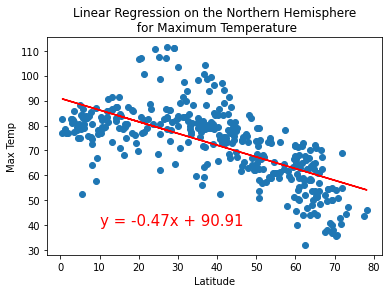

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(10,40))


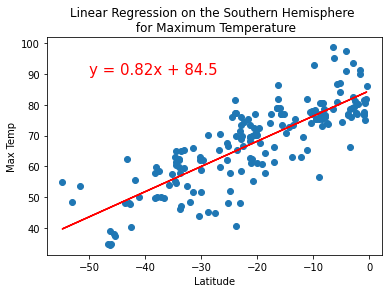

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))


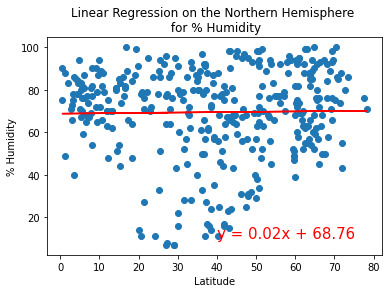

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

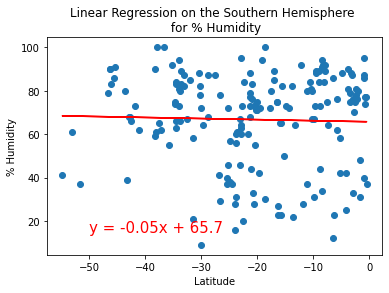

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

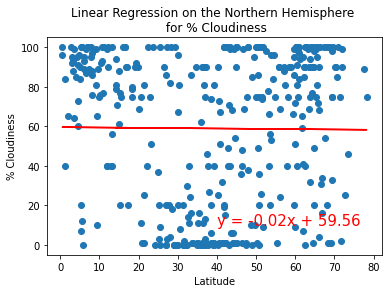

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

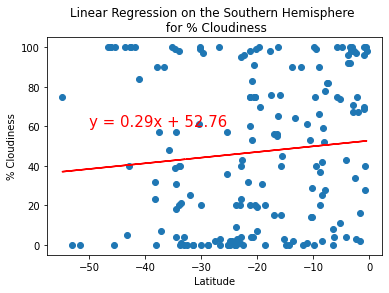

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

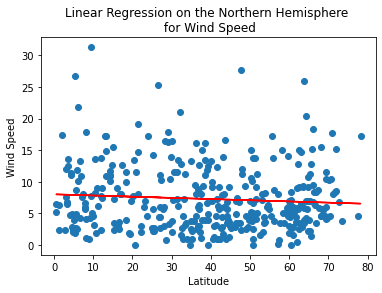

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

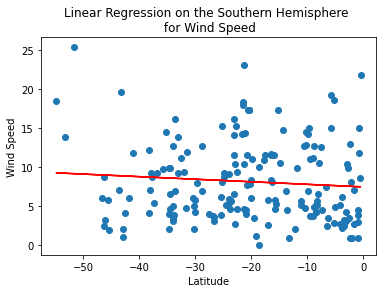

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))